# World Bank Education Indicators - Machine Learning Models

This notebook analyzes the World Bank Education Indicators dataset and builds three different machine learning models to predict educational outcomes.

## 1. Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 2. Load and Explore Data

In [2]:
df = pd.read_csv('education.csv')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (13560, 54)


,year,country,"Literacy rate, youth male (% of males ages 15-24)","Literacy rate, youth total (% of people ages 15-24)","Literacy rate, adult male (% of males ages 15 and above)","Literacy rate, adult total (% of people ages 15 and above)","Compulsory education, duration (years)","Preprimary education, duration (years)","School enrollment, preprimary (% gross)","School enrollment, preprimary, male (% gross)","Trained teachers in preprimary education, female (% of female teachers)","Trained teachers in preprimary education, male (% of male teachers)",Trained teachers in preprimary education (% of total teachers),"Primary completion rate, total (% of relevant age group)","Primary education, duration (years)","Primary education, pupils","School enrollment, primary (% gross)","School enrollment, primary, male (% gross)","School enrollment, primary, private (% of total primary)","Persistence to last grade of primary, total (% of cohort)","Trained teachers in primary education, male (% of male teachers)",Trained teachers in primary education (% of total teachers),"Primary education, teachers","Lower secondary completion rate, female (% of relevant age group)","Lower secondary completion rate, male (% of relevant age group)","Lower secondary completion rate, total (% of relevant age group)","Secondary education, duration (years)","Secondary education, pupils","School enrollment, secondary (% gross)","School enrollment, secondary, private (% of total secondary)","Trained teachers in secondary education, female (% of female teachers)","Trained teachers in lower secondary education, female (% of female teachers)","Trained teachers in lower secondary education, male (% of male teachers)",Trained teachers in lower secondary education (% of total teachers),"Trained teachers in secondary education, male (% of male teachers)","Trained teachers in upper secondary education, female (% of female teachers)","Trained teachers in upper secondary education, male (% of male teachers)",Trained teachers in upper secondary education (% of total teachers),Trained teachers in secondary education (% of total teachers),"Secondary education, teachers","Secondary education, teachers, female","School enrollment, tertiary (% gross)","School enrollment, tertiary, male (% gross)","Tertiary education, academic staff (% female)","Government expenditure on education, total (% of government expenditure)","Government expenditure on education, total (% of GDP)",Number of deaths ages 5-9 years,Number of deaths ages 10-14 years,Number of deaths ages 15-19 years,Number of deaths ages 20-24 years,"Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)"
0,1970,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,18839506.0,59.63031,67.680687,11.14241,54.973888,NaN,NaN,511060.750000,NaN,NaN,NaN,6.0,4133360.000,17.070379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.83013,2.02852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,AFG,NaN,NaN,NaN,NaN,NaN,NaN,0.29684,0.31523,NaN,NaN,NaN,NaN,6.0,540685.0,33.42001,56.701248,0.00000,NaN,NaN,NaN,13116.000000,NaN,NaN,NaN,6.0,116174.000,8.885660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021.00000,618.00000,0.80651,1.37593,5.54855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.100231,6.0,8067885.0,43.18832,53.464859,29.02075,73.962677,NaN,NaN,211954.109375,13.70312,20.85486,17.30076,7.0,1365179.375,7.989130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60178.65625,12138.96875,0.62107,0.99113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,AGO,NaN,NaN,NaN,NaN

In [3]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)

,Missing Values,Percentage
"Trained teachers in upper secondary education, male (% of male teachers)",12405,91.482301
"Trained teachers in upper secondary education, female (% of female teachers)",12405,91.482301
Trained teachers in upper secondary education (% of total teachers),12297,90.685841
"Trained teachers in lower secondary education, male (% of male teachers)",12270,90.486726
"Trained teachers in lower secondary education, female (% of female teachers)",12269,90.479351
Trained teachers in lower secondary education (% of total teachers),12170,89.749263
"Trained teachers in preprimary education, male (% of male teachers)",12067,88.989676
"Trained teachers in secondary education, male (% of male teachers)",11951,88.134218
"Trained teachers in secondary education, female (% of female teachers)",11951,88.134218
"Trained teachers in preprimary education, female (% of female teachers)",11887,87.662242


In [4]:
df.describe()

,year,"Literacy rate, youth male (% of males ages 15-24)","Literacy rate, youth total (% of people ages 15-24)","Literacy rate, adult male (% of males ages 15 and above)","Literacy rate, adult total (% of people ages 15 and above)","Compulsory education, duration (years)","Preprimary education, duration (years)","School enrollment, preprimary (% gross)","School enrollment, preprimary, male (% gross)","Trained teachers in preprimary education, female (% of female teachers)","Trained teachers in preprimary education, male (% of male teachers)",Trained teachers in preprimary education (% of total teachers),"Primary completion rate, total (% of relevant age group)","Primary education, duration (years)","Primary education, pupils","School enrollment, primary (% gross)","School enrollment, primary, male (% gross)","School enrollment, primary, private (% of total primary)","Persistence to last grade of primary, total (% of cohort)","Trained teachers in primary education, male (% of male teachers)",Trained teachers in primary education (% of total teachers),"Primary education, teachers","Lower secondary completion rate, female (% of relevant age group)","Lower secondary completion rate, male (% of relevant age group)","Lower secondary completion rate, total (% of relevant age group)","Secondary education, duration (years)","Secondary education, pupils","School enrollment, secondary (% gross)","School enrollment, secondary, private (% of total secondary)","Trained teachers in secondary education, female (% of female teachers)","Trained teachers in lower secondary education, female (% of female teachers)","Trained teachers in lower secondary education, male (% of male teachers)",Trained teachers in lower secondary education (% of total teachers),"Trained teachers in secondary education, male (% of male teachers)","Trained teachers in upper secondary education, female (% of female teachers)","Trained teachers in upper secondary education, male (% of male teachers)",Trained teachers in upper secondary education (% of total teachers),Trained teachers in secondary education (% of total teachers),"Secondary education, teachers","Secondary education, teachers, female","School enrollment, tertiary (% gross)","School enrollment, tertiary, male (% gross)","Tertiary education, academic staff (% female)","Government expenditure on education, total (% of government expenditure)","Government expenditure on education, total (% of GDP)",Number of deaths ages 5-9 years,Number of deaths ages 10-14 years,Number of deaths ages 15-19 years,Number of deaths ages 20-24 years,"Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)"
count,13560.000000,2835.000000,2836.000000,2664.000000,2671.000000,5891.000000,5454.000000,8214.000000,7311.000000,1673.000000,1493.000000,1853.000000,7614.000000,13334.000000,1.101800e+04,10752.000000,10234.000000,8267.000000,6179.000000,2354.000000,2632.000000,9.171000e+03,5832.000000,5823.000000,6487.000000,13209.000000,9.690000e+03,9386.000000,3970.000000,1609.000000,1291.000000,1290.000000,1390.000000,1609.000000,1155.000000,1155.000000,1263.000000,1774.000000,7.352000e+03,6.444000e+03,8579.000000,7639.000000,5274.000000,4435.000000,6254.000000,8.126000e+03,8126.000000,8126.000000,8126.000000,8126.000000,8126.000000,8126.000000,8126.000000
mean,1996.607743,87.752517,84.805112,80.780795,75.025073,9.461382,3.677759,46.677999,47.704739,75.107415,68.598598,74.932510,80.371894,5.686928,2.652325e+07,97.123157,99.951052,13.738253,79.049367,81.756413,84.550390,1.161052e+06,63.613353,64.092860,63.463970,6.360777,1.864483e+07,65.534057,18.762481,81.245982,81.053676,77.966732,79.931231,77.785578,81.123837,77.645936,79.784266,79.934394,1.363066e+06,7.449794e+05,25.173208,24.664068,33.766175,14.425799,4.296702,3.316884e+04,18946.43

## 3. Data Preprocessing and Feature Engineering

In [5]:
threshold = len(df) * 0.7
df_cleaned = df.dropna(axis=1, thresh=threshold)

print(f"Shape after dropping columns with >70% missing values: {df_cleaned.shape}")

target_column = 'School enrollment, primary (% gross)'

if target_column in df_cleaned.columns:
    print(f"Target column '{target_column}' exists in the dataset")
else:
    numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
    education_columns = [col for col in numeric_columns if 'school' in col.lower() or 'education' in col.lower()]
    
    if education_columns:
        missing_counts = {col: df_cleaned[col].isnull().sum() for col in education_columns}
        target_column = min(missing_counts, key=missing_counts.get)
        print(f"Using alternative target: '{target_column}'")
    else:
        missing_counts = {col: df_cleaned[col].isnull().sum() for col in numeric_columns if col != 'year'}
        target_column = min(missing_counts, key=missing_counts.get)
        print(f"Using fallback target: '{target_column}'")

Shape after dropping columns with >70% missing values: (13560, 8)
Target column 'School enrollment, primary (% gross)' exists in the dataset


In [6]:
df_model = df_cleaned.copy()

df_model = df_model.dropna(subset=[target_column])
print(f"Shape after removing rows with missing target: {df_model.shape}")

df_model['decade'] = (df_model['year'] // 10) * 10

def get_region(country_code):
    if country_code in ['EAS', 'EAP'] or country_code.startswith('EA'):
        return 'East Asia & Pacific'
    elif country_code in ['ECS', 'ECA'] or country_code.startswith('EC'):
        return 'Europe & Central Asia'
    elif country_code in ['LCN', 'LAC'] or country_code.startswith('LC'):
        return 'Latin America & Caribbean'
    elif country_code in ['MEA', 'MNA'] or country_code.startswith('ME'):
        return 'Middle East & North Africa'
    elif country_code in ['NAC'] or country_code.startswith('NA'):
        return 'North America'
    elif country_code in ['SAS'] or country_code.startswith('SA'):
        return 'South Asia'
    elif country_code in ['SSA', 'SSF'] or country_code.startswith('SS'):
        return 'Sub-Saharan Africa'
    else:
        return 'Other'

df_model['region'] = df_model['country'].apply(get_region)

primary_col = 'School enrollment, primary (% gross)'
secondary_col = 'School enrollment, secondary (% gross)'

if primary_col in df_model.columns and secondary_col in df_model.columns:
    df_model['edu_progression'] = df_model[secondary_col] / df_model[primary_col]
    df_model['edu_progression'] = df_model['edu_progression'].fillna(df_model['edu_progression'].median())
    print("Created education progression feature")

literacy_cols = [col for col in df_model.columns if 'Literacy rate' in col]
if literacy_cols:
    missing_counts = {col: df_model[col].isnull().sum() for col in literacy_cols}
    best_literacy_col = min(missing_counts, key=missing_counts.get)
    
    df_model['literacy_level'] = pd.cut(
        df_model[best_literacy_col].fillna(df_model[best_literacy_col].median()),
        bins=[0, 50, 75, 90, 100],
        labels=['Low', 'Medium', 'High', 'Very High']
    )
    print(f"Created literacy level feature using {best_literacy_col}")

gdp_col = 'Government expenditure on education, total (% of GDP)'
if gdp_col in df_model.columns:
    median_gdp = df_model[gdp_col].median()
    df_model['high_edu_investment'] = (df_model[gdp_col] > median_gdp).astype(int)
    df_model['high_edu_investment'] = df_model['high_edu_investment'].fillna(0)
    print("Created high education investment indicator")

Shape after removing rows with missing target: (10752, 8)


In [7]:
numeric_features = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [col for col in numeric_features if col != target_column]

valid_numeric_features = []
for col in numeric_features:
    missing_pct = df_model[col].isnull().mean() * 100
    if missing_pct < 50:
        valid_numeric_features.append(col)

categorical_features = ['region']
if 'literacy_level' in df_model.columns:
    categorical_features.append('literacy_level')

features = valid_numeric_features + categorical_features
print(f"Number of features selected: {len(features)}")
print(f"Features: {', '.join(features[:5])}{'...' if len(features)>5 else ''}")

X = df_model[features]
y = df_model[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Number of features selected: 8
Features: year, Primary education, duration (years), Primary education, pupils, School enrollment, primary, male (% gross), Secondary education, duration (years)...
Training set shape: (8601, 8)
Test set shape: (2151, 8)


In [8]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, valid_numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })
        
        importance_df = importance_df.sort_values('Importance', ascending=False).head(15)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Feature Importance for {model_name}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Feature importance not directly available for {model_name}")

## 4. Model 1: Support Vector Regression with Hyperparameter Tuning

In [20]:
from sklearn.svm import SVR

svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

svr_param_grid = {
    'regressor__kernel': ['linear', 'rbf', 'poly'],
    'regressor__C': [0.1, 1.0, 10.0],
    'regressor__gamma': ['scale', 'auto'],
    'regressor__epsilon': [0.1, 0.2, 0.5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

svr_grid_search = GridSearchCV(
    svr_pipeline,
    svr_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print("Training Support Vector Regression model with hyperparameter tuning...")
svr_grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {svr_grid_search.best_params_}")

svr_metrics = evaluate_model(svr_grid_search, X_test, y_test, "Support Vector Regression")

svr_cv_scores = cross_val_score(svr_grid_search.best_estimator_, X, y, cv=cv, scoring='neg_mean_squared_error')
print(f"\nCross-validation MSE scores: {-svr_cv_scores}")
print(f"Mean CV MSE: {-svr_cv_scores.mean():.4f}")
print(f"Standard deviation: {svr_cv_scores.std():.4f}")

# Plot feature importance for SVR
plot_feature_importance(svr_grid_search.best_estimator_.named_steps['regressor'], feature_names, "Support Vector Regression")
print(f"Best cross-validation score (negative MSE): {svr_grid_search.best_score_:.4f}")

Training Support Vector Regression model with hyperparameter tuning...

Best parameters: {'regressor__C': 10.0, 'regressor__epsilon': 0.5, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf'}

Support Vector Regression Evaluation Metrics:
Mean Squared Error (MSE): 37.1590
Root Mean Squared Error (RMSE): 6.0958
Mean Absolute Error (MAE): 2.5293
R² Score: 0.9050

Cross-validation MSE scores: [37.15892456 44.71970236 40.91425201 36.80904764 40.65946004]
Mean CV MSE: 40.0523
Standard deviation: 2.8909
Feature importance not directly available for Support Vector Regression
Best cross-validation score (negative MSE): -42.0446


## 5. Model 2: Random Forest Regressor with Hyperparameter Tuning

Training Random Forest model with hyperparameter tuning...

Best parameters: {'regressor__max_depth': 30, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best cross-validation score (negative MSE): -23.2658

Random Forest Regressor Evaluation Metrics:
Mean Squared Error (MSE): 16.7882
Root Mean Squared Error (RMSE): 4.0973
Mean Absolute Error (MAE): 1.9254
R² Score: 0.9571

Best parameters: {'regressor__max_depth': 30, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best cross-validation score (negative MSE): -23.2658

Random Forest Regressor Evaluation Metrics:
Mean Squared Error (MSE): 16.7882
Root Mean Squared Error (RMSE): 4.0973
Mean Absolute Error (MAE): 1.9254
R² Score: 0.9571

Cross-validation MSE scores: [16.57521294 23.58662938 21.05145653 20.5031695  20.02421205]
Mean CV MSE: 20.3481
Standard deviation: 2.2515

Cross-validation MSE scores: [16.57521294 23.58662938 21.051

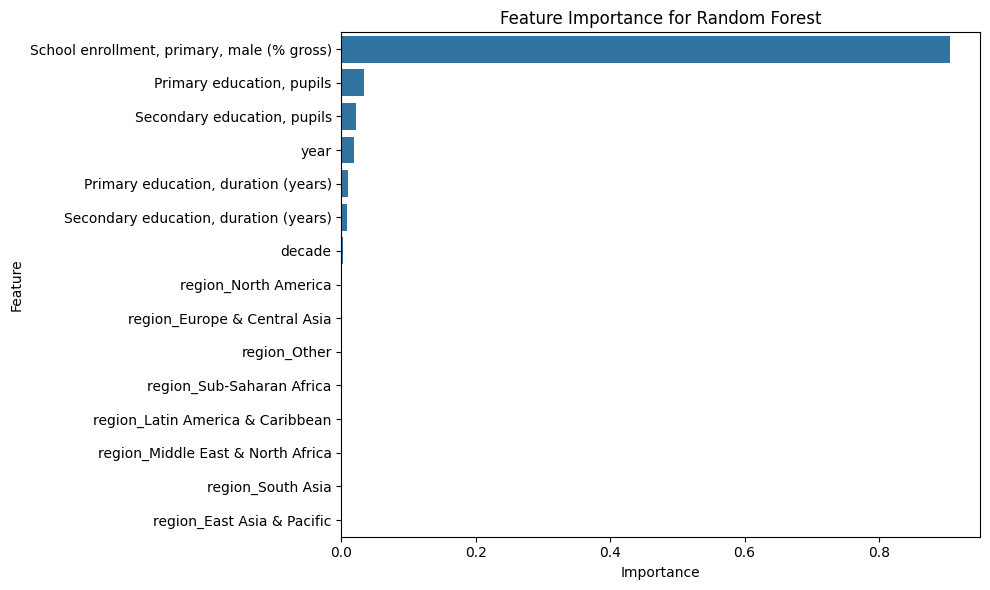

In [10]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print("Training Random Forest model with hyperparameter tuning...")
rf_grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation score (negative MSE): {rf_grid_search.best_score_:.4f}")

rf_metrics = evaluate_model(rf_grid_search, X_test, y_test, "Random Forest Regressor")

rf_cv_scores = cross_val_score(rf_grid_search.best_estimator_, X, y, cv=cv, scoring='neg_mean_squared_error')
print(f"\nCross-validation MSE scores: {-rf_cv_scores}")
print(f"Mean CV MSE: {-rf_cv_scores.mean():.4f}")
print(f"Standard deviation: {rf_cv_scores.std():.4f}")

preprocessor = rf_grid_search.best_estimator_.named_steps['preprocessor']
preprocessor.fit(X)

feature_names = []

if hasattr(preprocessor.transformers_[0][1], 'get_feature_names_out'):
    feature_names.extend(list(preprocessor.transformers_[0][1].get_feature_names_out(valid_numeric_features)))
else:
    feature_names.extend(valid_numeric_features)
    
if hasattr(preprocessor.transformers_[1][1], 'get_feature_names_out'):
    cat_features = list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))
    feature_names.extend(cat_features)
else:
    ohe = preprocessor.transformers_[1][1].named_steps['onehot']
    if hasattr(ohe, 'get_feature_names_out'):
        cat_features = list(ohe.get_feature_names_out(categorical_features))
        feature_names.extend(cat_features)
    else:
        feature_names.extend([f"cat_feature_{i}" for i in range(len(categorical_features))])

best_rf = rf_grid_search.best_estimator_.named_steps['regressor']

plot_feature_importance(best_rf, feature_names, "Random Forest")

## 6. Model 3: Gradient Boosting Regressor with Hyperparameter Tuning

Training Gradient Boosting model with hyperparameter tuning...

Best parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best cross-validation score (negative MSE): -22.7985

Gradient Boosting Regressor Evaluation Metrics:
Mean Squared Error (MSE): 16.4658
Root Mean Squared Error (RMSE): 4.0578
Mean Absolute Error (MAE): 1.9149
R² Score: 0.9579

Best parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best cross-validation score (negative MSE): -22.7985

Gradient Boosting Regressor Evaluation Metrics:
Mean Squared Error (MSE): 16.4658
Root Mean Squared Error (RMSE): 4.0578
Mean Absolute Error (MAE): 1.9149
R² Score: 0.9579

Cross-validation MSE scores: [16.46584588 26.45910586 22.00345767 20.12122455 21.00731262]
Mean CV MSE: 21.2114
Standard deviation: 3.2223

Cross-validation MSE scores: [16.46584588 26.4591058

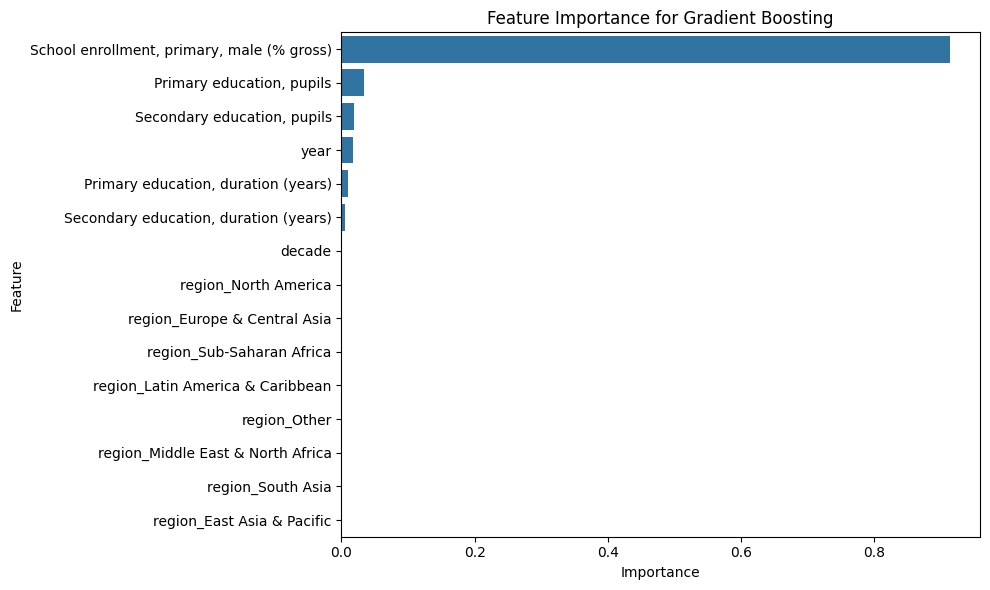

In [11]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

gb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5]
}

gb_grid_search = GridSearchCV(
    gb_pipeline,
    gb_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print("Training Gradient Boosting model with hyperparameter tuning...")
gb_grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {gb_grid_search.best_params_}")
print(f"Best cross-validation score (negative MSE): {gb_grid_search.best_score_:.4f}")

gb_metrics = evaluate_model(gb_grid_search, X_test, y_test, "Gradient Boosting Regressor")

gb_cv_scores = cross_val_score(gb_grid_search.best_estimator_, X, y, cv=cv, scoring='neg_mean_squared_error')
print(f"\nCross-validation MSE scores: {-gb_cv_scores}")
print(f"Mean CV MSE: {-gb_cv_scores.mean():.4f}")
print(f"Standard deviation: {gb_cv_scores.std():.4f}")

best_gb = gb_grid_search.best_estimator_.named_steps['regressor']

plot_feature_importance(best_gb, feature_names, "Gradient Boosting")

## 7. Model Comparison

Model Performance Comparison:


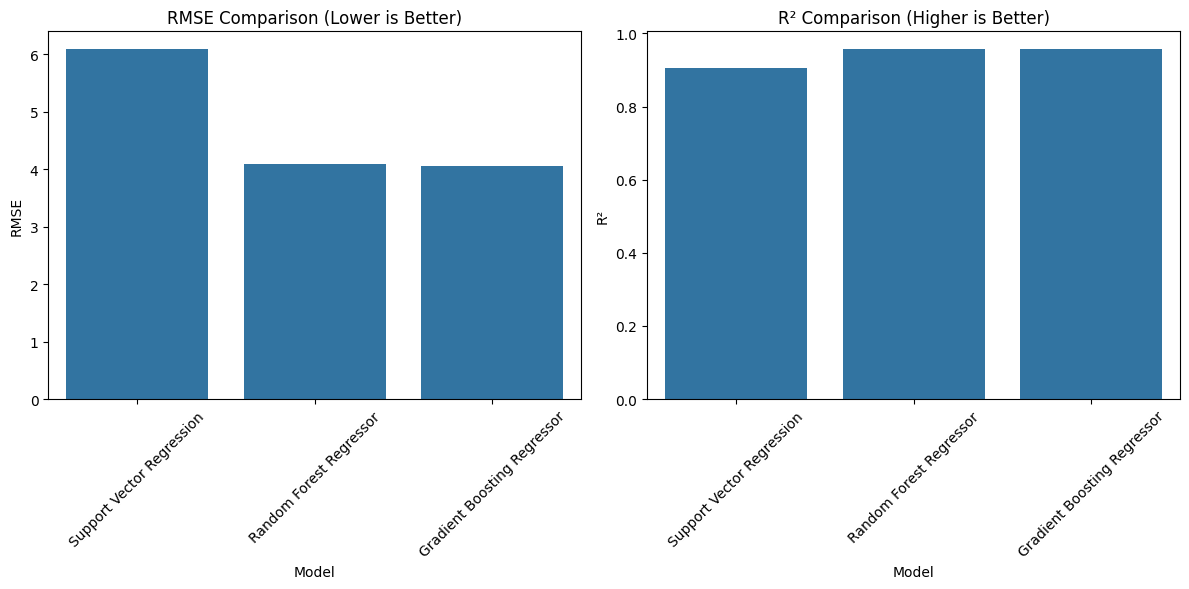

In [13]:
# Compare all three models
metrics_df = pd.DataFrame([svr_metrics, rf_metrics, gb_metrics])
metrics_df = metrics_df.set_index('Model')

print("Model Performance Comparison:")
metrics_df

# Visualize performance comparison
plt.figure(figsize=(12, 6))

# Plot RMSE comparison
plt.subplot(1, 2, 1)
sns.barplot(x=metrics_df.index, y='RMSE', data=metrics_df.reset_index())
plt.title('RMSE Comparison (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot R² comparison
plt.subplot(1, 2, 2)
sns.barplot(x=metrics_df.index, y='R²', data=metrics_df.reset_index())
plt.title('R² Comparison (Higher is Better)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
# Save models as H5 file
import joblib
joblib.dump(svr_grid_search.best_estimator_, 'svr_model.pkl')
joblib.dump(rf_grid_search.best_estimator_, 'rf_model.pkl')
joblib.dump(gb_grid_search.best_estimator_, 'gb_model.pkl')
print("Models saved as .pkl files.")

Models saved as .pkl files.


## 8. Additional Visualizations

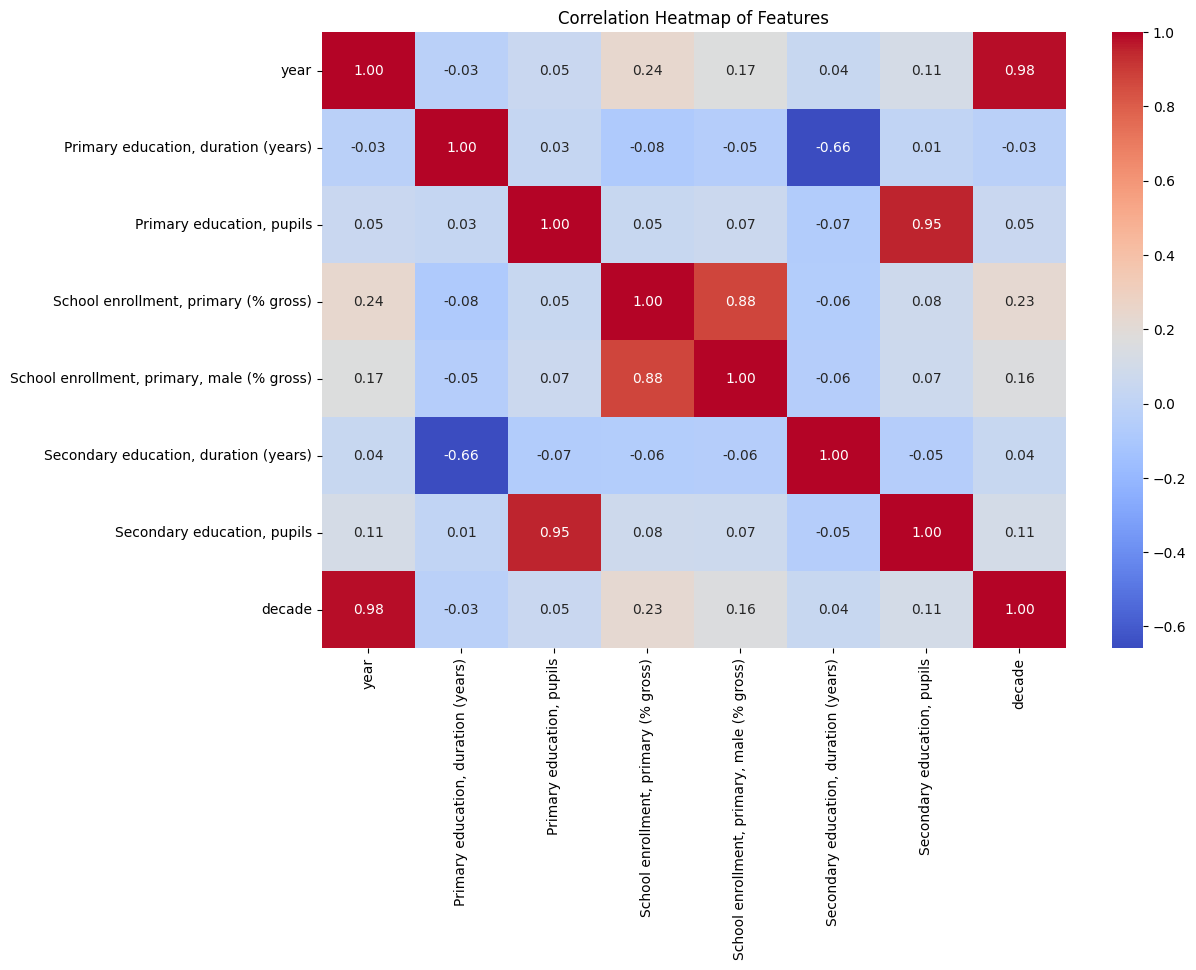

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for the correlation matrix
numeric_df = df_model.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()